In [1]:
import pandas as pd 
from wikidata2df import wikidata2df

with open("../queries/mouse_genes_and_pseudogenes.rq", "r") as f:
    query = f.read()

df = wikidata2df(query)

In [2]:
markers = pd.read_csv("../data/PanglaoDB_markers_27_Mar_2020.tsv", sep = "\t")

In [3]:
mouse_markers = markers[["Mm" in val for val in markers["species"]]]

In [4]:
mouse_markers.head()

,species,official gene symbol,cell type,nicknames,ubiquitousness index,product description,gene type,canonical marker,germ layer,organ,sensitivity_human,sensitivity_mouse,specificity_human,specificity_mouse
0,Mm Hs,CTRB1,Acinar cells,CTRB,0.017,chymotrypsinogen B1,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.957143,0.000629,0.015920
1,Mm Hs,KLK1,Acinar cells,Klk6,0.013,kallikrein 1,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.314286,0.005031,0.012826
2,Mm Hs,RBPJL,Acinar cells,RBP-L|SUHL|RBPSUHL,0.001,recombination signal binding protein for immun...,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.000000,0.000000,0.000000
3,Mm Hs,PTF1A,Acinar cells,PTF1-p48|bHLHa29,0.001,pancreas associated transcription factor 1a,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.157143,0.000629,0.000773
4,Mm,TRY4,Acinar cells,NaN,0.007,trypsin 4,protein coding gene,1.0,Endoderm,Pancreas,NaN,NaN,NaN,NaN



As official gene symbols from Mouse Genome Informatics are _not_ all caps, we will use an heuristic and ignore case for the match. 
To be precise, we will transform the MGI symbol to all caps.

This is what can be assumed from the original source. 

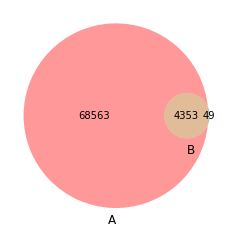

In [5]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline


mouse_genes_wikidata = [symbol.upper() for symbol in df["mgi_symbol"].values]
unique_genes_wikidata = set(mouse_genes_wikidata)

unique_genes_panglao = set(mouse_markers["official gene symbol"].values)

venn2([unique_genes_wikidata, unique_genes_panglao])
plt.show()


In [6]:
unique_genes_panglao - unique_genes_wikidata

{'AAED1',
 'ALCAM ',
 'CD244',
 'CTGF',
 'CYR61',
 'DYNLT1',
 'ERO1LB',
 'FAM129B',
 'FAM129C',
 'FAM196A',
 'FAM198B',
 'FAM19A1',
 'FAM19A5',
 'FAM69B',
 'FAM84A',
 'FAM92B',
 'H1FNT',
 'H2AFB1',
 'H2AFX',
 'H2AFY',
 'H2AFZ',
 'HIST1H1D',
 'HIST1H2AC',
 'HIST1H2AE',
 'HIST1H2AO',
 'HIST1H2BC',
 'HIST1H2BG',
 'HIST1H2BK',
 'HIST1H3H',
 'HIST2H2BE',
 'HRASLS5',
 'KIF1BP',
 'MARCH1',
 'MARCH11',
 'MKL2',
 'MNDA',
 'MUM1',
 'NOV',
 'PTGDS ',
 'SEPT4',
 'SEPT6',
 'SEPT9',
 'SFTPB',
 'SPERT',
 'TCRG-C1',
 'TMEM173',
 'USMG5',
 'WISP1',
 'WISP2'}

For these 77 cases, it is likely that panglao is not compatible with MGI upper case. Let`s check on Wikidata what are the likely best options. 

Some of the cases might be the same of the human genes. In that ocasion, most cases were due to issues regargind aliases. Once more, I'll note down any extraordinary cases.

In fact, let's check which of those were not covered by the human correction


In [7]:
gene_retification = {
 'AAED1' : "PRXL2C",
 'ALCAM ' : "ALCAM",
 'CD244' : "CD244A",
 'CTGF' : "CCN2",
 'CYR61' : "CCN1",
 'DYNLT1' : "MULTIPLE ORTHOLOGS",
 'ERO1LB' : "ERO1B",
 'FAM129B' : "NIBAN2",
 'FAM129C' : "NIBAN3",
 'FAM196A' : "INSYN2A",
 'FAM198B' : "GASK1B",
 'FAM19A1' : "TAFA1",
 'FAM19A5' : "TAFA5",
 'FAM69B' : "DIPK1B",
 'FAM84A' : "LRATD1",
 'FAM92B' : "CIBAR2",
 'H1FNT' : "H1F7",
 'H2AFB1' : "H2AB1",
 'H2AFX' : "H2AX",
 'H2AFY' : "MACROH2A1",
 'H2AFZ' : "H2AZ1",
 'HIST1H1D' : "H1F3",
 'HIST1H2AC' : "H2AC6",
 'HIST1H2AO' : "H2AC3",
 'HIST1H2AE' : "H2AC8",
 'HIST1H2BC' : "AMBIGUOUS",
 'HIST1H2BG' : "AMBIGUOUS",
 'HIST1H2BK' : "H2BC12",
 'HIST1H3H' : "H3C10",
 'HIST2H2BE' : "H2BC21",
 'HLA-DRB6' : "HLA-DRB6",
 'HRASLS5' : "PLAAT5",
 'KIF1BP' : "KIFBP",
 'MARCH1' : "MARCHF1",
 'MARCH11' : "MARCHF11",
 'MKL2' : "MRTFB",
 'MNDA' : "IFI211",
 'MUM1' : "AMBIGUOUS",
 'NOV' : "AMBIGUOUS",
 'PPY2P' : "PPY2P",
 'PTGDS ' : "PTGDS",
 'SEPT4' : "SEPTIN4",
 'SEPT6' : "SEPTIN6",
 'SEPT9' : "SEPTIN9",
 'SIX3OS1' : "NO HOMOLOG IN HUMANS",
 'SPERT' : "CBY2",
 'TCRG-C1' : "TRGC1",
 'TMEM173' : "STING1",
 'USMG5' : "AMBIGUOUS",
 'WDR60' : "DYNC2I1",
 'WISP1' : "CCN4",
 'WISP2' : "CCN5"}

In [8]:
mouse_markers_lean = mouse_markers[["official gene symbol", "cell type"]]

In [9]:
mouse_markers_lean["retified_symbols"] = mouse_markers_lean["official gene symbol"].replace(gene_retification)

In [10]:
df["retified_symbols"] = [a.upper() for a in df["mgi_symbol"]]

In [11]:
mouse_markers_lean = mouse_markers_lean.merge(df, left_on="retified_symbols", right_on="retified_symbols")
mouse_markers_lean

,official gene symbol,cell type,retified_symbols,item,itemLabel,mgi_symbol
0,CTRB1,Acinar cells,CTRB1,Q18261856,Ctrb1,Ctrb1
1,CTRB1,Enterocytes,CTRB1,Q18261856,Ctrb1,Ctrb1
2,KLK1,Acinar cells,KLK1,Q18251870,Klk1,Klk1
3,KLK1,Distal tubule cells,KLK1,Q18251870,Klk1,Klk1
4,KLK1,Endothelial cells,KLK1,Q18251870,Klk1,Klk1
...,...,...,...,...,...,...
7891,SLC14A1,Urothelial cells,SLC14A1,Q18272870,Slc14a1,Slc14a1
7892,UPK3A,Urothelial cells,UPK3A,Q18255259,Upk3a,Upk3a
7893,UPK1A,Urothelial cells,UPK1A,Q18273793,Upk1a,Upk1a
7894,UPK2,Urothelial cells,UPK2,Q18255258,Upk2,Upk2


In [13]:
mouse_gene_reference_from_panglao_to_wikidata_22_12_2020 = mouse_markers_lean[["official gene symbol", "item"]]
mouse_gene_reference_from_panglao_to_wikidata_22_12_2020.colums = ["panglao", "wikidata"]

In [15]:
mouse_gene_reference_from_panglao_to_wikidata_22_12_2020.to_csv("../results/mouse_gene_reference_from_panglao_to_wikidata_22_12_2020.csv", index=False)